In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# https://analyzingalpha.com/yfinance-python

In [4]:
goog = yf.Ticker('goog')
data = goog.history()
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-17 00:00:00-04:00,100.839996,103.489998,100.750000,102.459999,76109100,0.0,0.0
2023-03-20 00:00:00-04:00,101.059998,102.580002,100.790001,101.930000,26033900,0.0,0.0
2023-03-21 00:00:00-04:00,101.980003,105.959999,101.860001,105.839996,33122800,0.0,0.0
2023-03-22 00:00:00-04:00,105.139999,107.510002,104.209999,104.220001,32336900,0.0,0.0
2023-03-23 00:00:00-04:00,105.889999,107.099998,105.410004,106.260002,30450822,0.0,0.0


<Axes: xlabel='Date', ylabel='Open'>

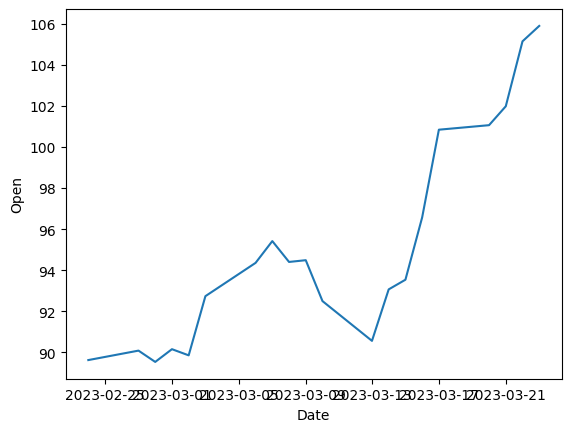

In [5]:


sns.lineplot(x="Date", y="Open", data=data)

---
## I need all companies from SP500

### Use Pandas to get the table from wikipedia (Beautifulsoup for web scrapping is using in backend)

---

In [6]:
import os 

path = './data/'
isExist = os.path.exists(path+'sp500list.csv')

want_save = True

if isExist:
    sp500 = pd.read_csv('./data/sp500list.csv')
else:
    url =  'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    sp500_all = pd.read_html(url)
    sp500 = sp500_all[0]
    sp500["Symbol"]= sp500["Symbol"].map(lambda x: x.replace(".","-")).unique().tolist()
    if want_save:
        # Save
        isExist2 = os.path.exists(path)
        if not isExist2:
            os.makedirs(path)
        sp500.to_csv(path+'sp500list.csv', index=False)
    

sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


---
### Get data from yfinance

---

In [4]:
# sp500_cap_by_month = yf.download('SPY', start='2000-01-01', end='2023-03-20')
# sp500_cap_by_day = yf.download('SPY', start='2000-01-01', end='2023-03-20',interval = "1d")

sp500_cap_by_month = yf.download('SPY', period = "23y")
sp500_cap_by_day = yf.download('SPY', period = "23y",interval = "1d")

sp500_cap_by_month.to_csv('./data/SPY.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
sp500_cap_by_day.reset_index(inplace=True)
sp500_cap_by_day["d"] = sp500_cap_by_day["Date"].copy()
sp500_cap_by_day.rename(columns={"d":"Date", "Date":"d"},inplace=True)
sp500_cap_by_day.set_index("Date", inplace=True)
sp500_cap_by_day.rename(columns={"d":"Date"}, inplace=True)
sp500_cap_by_day

# -----------------------------------------------------------------------
sp500_cap_by_month.reset_index(inplace=True)
sp500_cap_by_month["d"] = sp500_cap_by_month["Date"].copy()
sp500_cap_by_month.rename(columns={"d":"Date", "Date":"d"},inplace=True)
sp500_cap_by_month.set_index("Date", inplace=True)
sp500_cap_by_month.rename(columns={"d":"Date"}, inplace=True)
sp500_cap_by_month


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,152.875000,155.750000,151.718750,153.562500,100.505493,11462900
2000-03-27,2000-03-27,153.375000,153.781250,151.812500,151.937500,99.441948,8798600
2000-03-28,2000-03-28,151.250000,152.984375,150.593750,151.062500,98.869293,6334400
2000-03-29,2000-03-29,151.562500,152.484375,149.656250,151.218750,98.971535,6747500
2000-03-30,2000-03-30,150.156250,151.921875,147.125000,148.687500,97.314827,9491900
...,...,...,...,...,...,...,...
2023-03-17,2023-03-17,393.220001,394.399994,388.549988,389.989990,389.989990,140047400
2023-03-20,2023-03-20,390.799988,394.170013,390.070007,393.739990,393.739990,93055800
2023-03-21,2023-03-21,397.239990,399.410004,395.579987,398.910004,398.910004,91524200


In [9]:
sp500_cap_by_day.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,152.87500,155.750000,151.71875,153.56250,100.505516,11462900
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441978,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869278,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971581,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314873,9491900


---


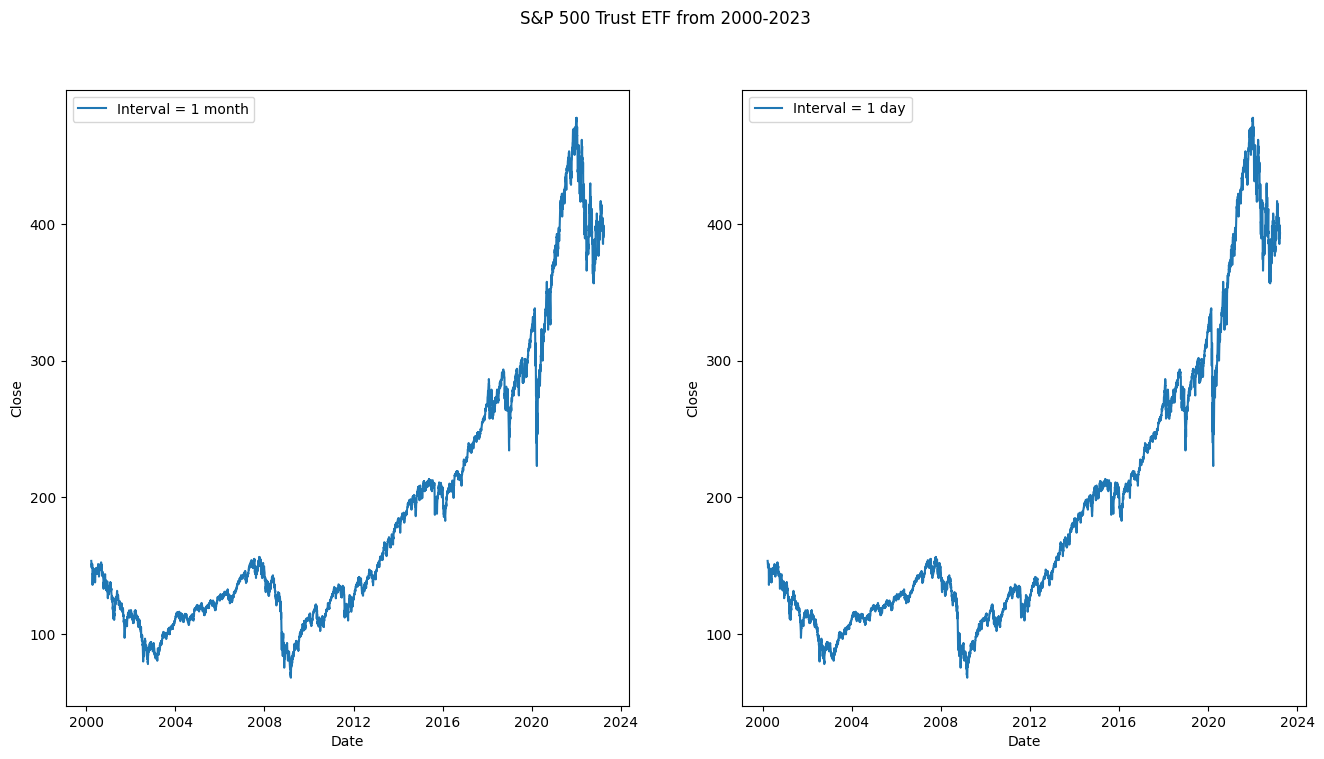

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.lineplot(ax=ax[0], x="Date", y="Close", data=sp500_cap_by_month, label="Interval = 1 month")
sns.lineplot(ax=ax[1],x="Date", y="Close", data=sp500_cap_by_day, label="Interval = 1 day")
plt.suptitle("S&P 500 Trust ETF from 2000-2023")
plt.show()

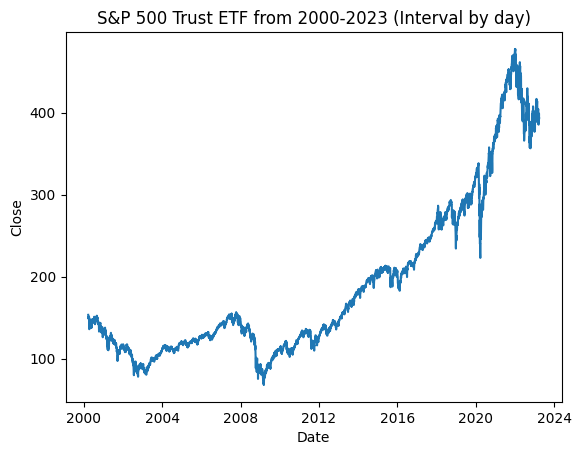

In [9]:
sns.lineplot(x="Date", y="Close", data=sp500_cap_by_day)
plt.title("S&P 500 Trust ETF from 2000-2023 (Interval by day)")
plt.show()

---
### Dot-com bubble

---


In [11]:
dot_com_bubble = sp500_cap_by_day['2000-01-01':'2004-01-01']
dot_com_bubble.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,152.87500,155.750000,151.71875,153.56250,100.505516,11462900
2000-03-27,2000-03-27,153.37500,153.781250,151.81250,151.93750,99.441978,8798600
2000-03-28,2000-03-28,151.25000,152.984375,150.59375,151.06250,98.869278,6334400
2000-03-29,2000-03-29,151.56250,152.484375,149.65625,151.21875,98.971581,6747500
2000-03-30,2000-03-30,150.15625,151.921875,147.12500,148.68750,97.314873,9491900


In [12]:
# mask = dot_com_bubble['Close'].min()==dot_com_bubble['Close']
# dot_com_bubble[mask]
min_date = dot_com_bubble.loc[dot_com_bubble['Close'].idxmin(), 'Date']
min_date

Timestamp('2002-10-09 00:00:00')

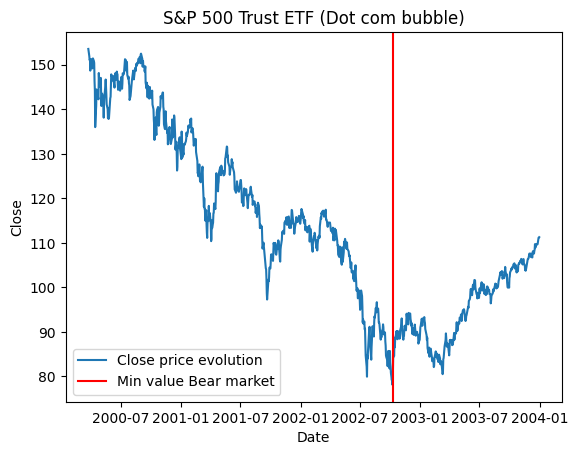

In [13]:
sns.lineplot(x="Date", y="Close", data=dot_com_bubble, label="Close price evolution")
plt.axvline(x=min_date, label="Min value Bear market", color='red')
plt.title("S&P 500 Trust ETF (Dot com bubble)")
plt.legend()
plt.show()

---
### Subprime crisis

---

In [14]:
subprime_bubble = sp500_cap_by_day['2006-01-01':'2010-01-01']
min_date_sp = subprime_bubble.loc[subprime_bubble['Close'].idxmin(), 'Date']
max_date_sp = subprime_bubble.loc[subprime_bubble['Close'].idxmax(), 'Date']
print("min stock value in subprime crisis",min_date_sp)
print("max stock value in subprime crisis",max_date_sp)

min stock value in subprime crisis 2009-03-09 00:00:00
max stock value in subprime crisis 2007-10-09 00:00:00


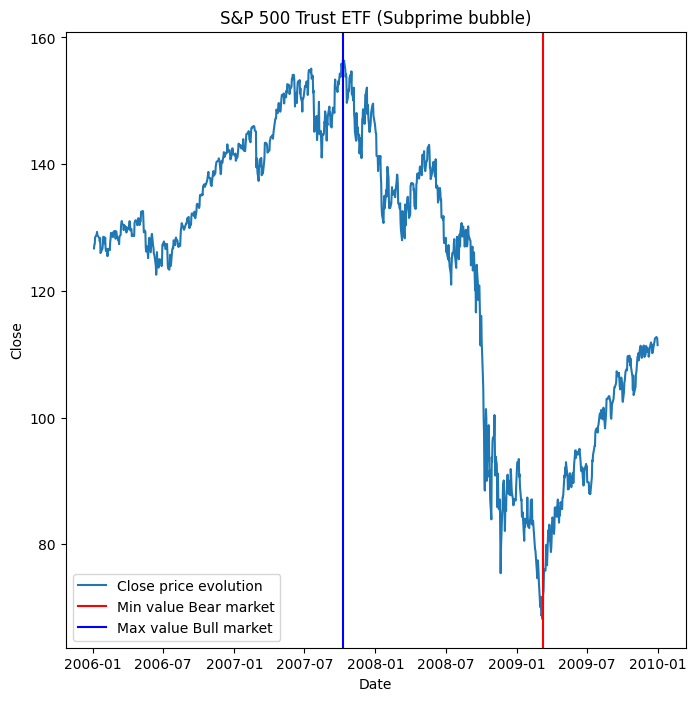

In [15]:

fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=subprime_bubble, label="Close price evolution", ax=ax)
ax.axvline(x=min_date_sp, label="Min value Bear market", color='red')
plt.axvline(x=max_date_sp, label="Max value Bull market", color='blue')
plt.title("S&P 500 Trust ETF (Subprime bubble)")
plt.legend()

plt.show()

---
### Covid pandemic

---

In [16]:
sep = "--------------------------------------------------------------------------------"

In [17]:
covid_pandemic = sp500_cap_by_day['2019-01-01':'2022-01-01']
pre_covid = sp500_cap_by_day['2018-01-01':'2019-12-31']


min_date_covid = covid_pandemic.loc[covid_pandemic['Close'].idxmin(), 'Date']
max_date_covid = covid_pandemic.loc[covid_pandemic['Close'].idxmax(), 'Date']

min_price_covid = covid_pandemic['Close'].min()
max_price_covid = covid_pandemic['Close'].max()
print(sep)
print("Date of min stock value across Covid pandemic --> ",min_date_covid)
print("Date of max stock value across and far beyonf Covid pandemic --> ",max_date_covid)
print("min stock value across Covid pandemic --> ",min_price_covid)
print("max stock value across Covid pandemic --> ",max_price_covid)
print(sep)


max_date_pre_covid = pre_covid.loc[pre_covid['Close'].idxmax(), 'Date']
max_price_pre_covid = pre_covid['Close'].max()
print("max price pre-pandemic --> ", max_price_pre_covid)
print(sep)
print("Delta variation (price loss) --> ", min_price_covid-max_price_pre_covid)
print("Delta variation % (price loss) --> ", round(100*(min_price_covid-max_price_pre_covid)/max_price_pre_covid, 2))


--------------------------------------------------------------------------------
Date of min stock value across Covid pandemic -->  2020-03-23 00:00:00
Date of max stock value across and far beyonf Covid pandemic -->  2021-12-29 00:00:00
min stock value across Covid pandemic -->  222.9499969482422
max stock value across Covid pandemic -->  477.4800109863281
--------------------------------------------------------------------------------
max price pre-pandemic -->  322.94000244140625
--------------------------------------------------------------------------------
Delta variation (price loss) -->  -99.99000549316406
Delta variation % (price loss) -->  -30.96


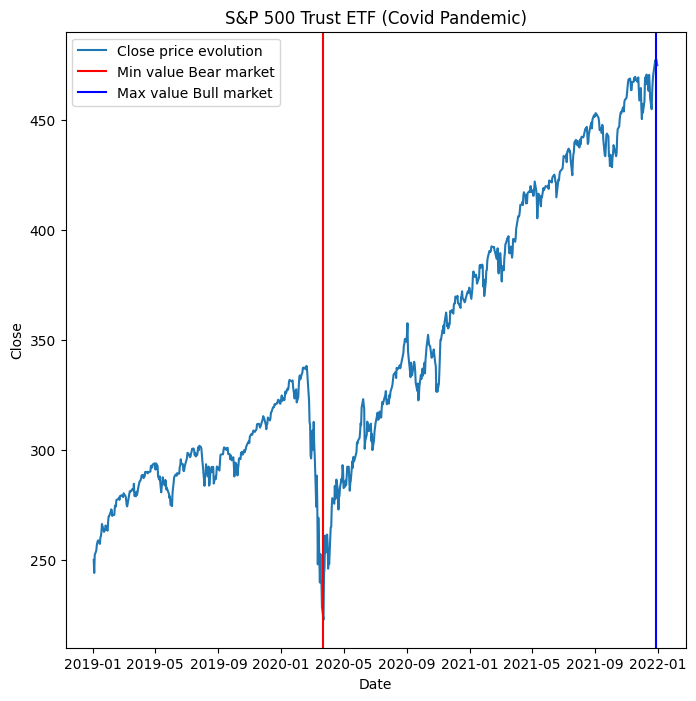

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=covid_pandemic, label="Close price evolution", ax=ax)
ax.axvline(x=min_date_covid, label="Min value Bear market", color='red')
plt.axvline(x=max_date_covid, label="Max value Bull market", color='blue')
plt.title("S&P 500 Trust ETF (Covid Pandemic)")
plt.legend()

plt.show()

---
## Al together

---

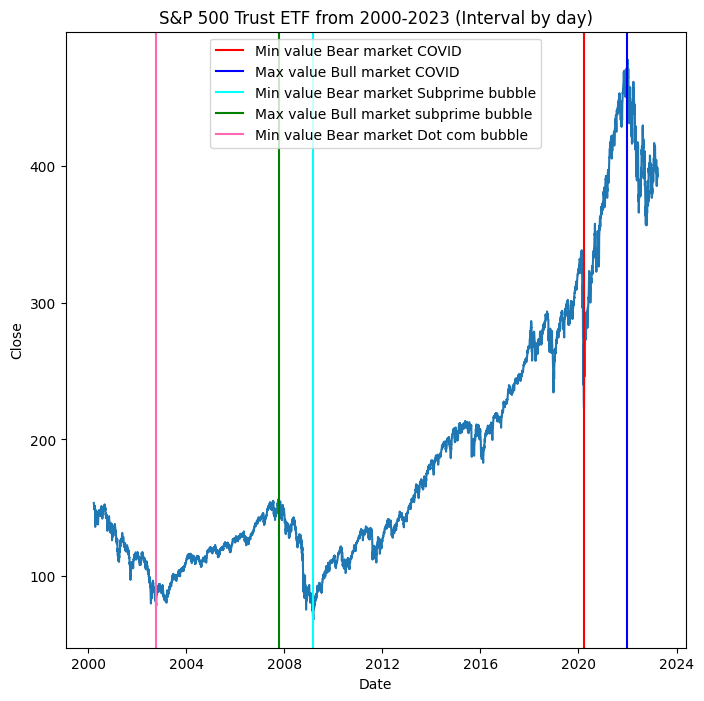

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.lineplot(x="Date", y="Close", data=sp500_cap_by_day, ax=ax)
plt.title("S&P 500 Trust ETF from 2000-2023 (Interval by day)")

ax.axvline(x=min_date_covid, label="Min value Bear market COVID", color='red')
ax.axvline(x=max_date_covid, label="Max value Bull market COVID", color='blue')
ax.axvline(x=min_date_sp, label="Min value Bear market Subprime bubble", color='cyan')
ax.axvline(x=max_date_sp, label="Max value Bull market subprime bubble", color='green')
ax.axvline(x=min_date, label="Min value Bear market Dot com bubble", color='hotpink')
plt.legend()
plt.show()

---
### Sp500 companies by sector

---


In [20]:
sector = sp500['GICS Sub-Industry'].unique().tolist()

In [21]:
companies_by_sector = {}
for s in sector:
    companies_by_sector[s] = list(sp500.loc[sp500['GICS Sub-Industry'] == s, 'Symbol'])

companies_by_sector
    

{'Industrial Conglomerates': ['MMM', 'GE', 'HON'],
 'Building Products': ['AOS', 'ALLE', 'CARR', 'FAST', 'JCI', 'MAS', 'TT'],
 'Health Care Equipment': ['ABT',
  'A',
  'BAX',
  'BDX',
  'BSX',
  'DHR',
  'DXCM',
  'EW',
  'HOLX',
  'IDXX',
  'PODD',
  'ISRG',
  'MDT',
  'PKI',
  'RMD',
  'STE',
  'SYK',
  'TFX',
  'ZBH'],
 'Pharmaceuticals': ['ABBV',
  'BMY',
  'CTLT',
  'LLY',
  'JNJ',
  'MRK',
  'OGN',
  'PFE',
  'VTRS',
  'ZTS'],
 'IT Consulting & Other Services': ['ACN', 'CTSH', 'DXC', 'EPAM', 'IT', 'IBM'],
 'Interactive Home Entertainment': ['ATVI', 'EA', 'TTWO'],
 'Agricultural Products & Services': ['ADM', 'BG'],
 'Application Software': ['ADBE',
  'ANSS',
  'ADSK',
  'CDNS',
  'CDAY',
  'FICO',
  'GEN',
  'INTU',
  'ORCL',
  'PAYC',
  'PTC',
  'CRM',
  'SNPS',
  'TYL'],
 'Human Resource & Employment Services': ['ADP', 'PAYX', 'RHI'],
 'Automotive Retail': ['AAP', 'KMX'],
 'Independent Power Producers & Energy Traders': ['AES', 'NRG'],
 'Life & Health Insurance': ['AFL', 'GL', 

In [54]:
df = 
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-24,35.880001,36.480000,35.540001,35.980000,35.980000,550000
2000-03-27,36.099998,36.119999,33.959999,34.200001,34.200001,535000
2000-03-28,33.860001,33.939999,32.939999,33.340000,33.340000,665000
2000-03-29,33.340000,33.400002,32.799999,33.340000,33.340000,490000
2000-03-30,33.279999,36.040001,33.220001,34.779999,34.779999,1270000
...,...,...,...,...,...,...
2023-03-17,301.299988,301.299988,292.420013,293.510010,293.510010,15609400
2023-03-20,295.570007,301.510010,295.059998,301.059998,301.059998,6056000
2023-03-21,304.559998,305.630005,302.250000,303.850006,303.850006,4724000


In [57]:
import os 

def save_companies_sector(sector, companies_by_sector):
    all_comp = companies_by_sector[sector]
    
    path = './data/all_tickers/'+sector+"/"       
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)


    for c in all_comp:
        df = yf.download(c, period = "23y")
        df.to_csv(path+c+".csv")
    
    


    

    
    

In [58]:
path = './data/all_tickers/'
isExist = os.path.exists(path)
if not isExist:
    for s in sector:
        save_companies_sector(s, companies_by_sector)


In [61]:
path = './data/all_tickers/'+'Multi-Sector Holdings'+"/"       
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)

df = yf.download('BRK-B', period = "23y")
df.to_csv(path+'BRK-B'+".csv")


[*********************100%***********************]  1 of 1 completed


In [22]:
posibilities = ['Health Care Equipment','Pharmaceuticals','IT Consulting & Other Services',
'Application Software','Life & Health Insurance','Internet Services & Infrastructure',
'Passenger Airlines','Health Care Supplies','Interactive Media & Services', 'Internet & Direct Marketing Retail'
'Semiconductors','Biotechnology','Oil & Gas Exploration & Production', 'Multi-Sector Holdings']

In [66]:
import matplotlib.dates as md
def plot(df):
    date_form = md.DateFormatter("%m-%d")
    
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(x="Date", y="Close", data=df, ax=ax)
    ax.xaxis.set_major_formatter(date_form)
    # plt.title(f"{ticker} Price evolution from 2000-2023 (Interval by day)")

In [64]:
def add_date_column(df,ticker):
    
    df["d"] = df["Date"].copy()
    df.rename(columns={"d":"Date", "Date":"d"},inplace=True)
    df.set_index("Date", inplace=True)
    df.rename(columns={"d":"Date"}, inplace=True)
    plot(df)
    return df

./data/all_tickers/Multi-Sector Holdings/BRK-B.csv


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-03-24,2000-03-24,35.880001,36.480000,35.540001,35.980000,35.980000,550000
2000-03-27,2000-03-27,36.099998,36.119999,33.959999,34.200001,34.200001,535000
2000-03-28,2000-03-28,33.860001,33.939999,32.939999,33.340000,33.340000,665000
2000-03-29,2000-03-29,33.340000,33.400002,32.799999,33.340000,33.340000,490000
2000-03-30,2000-03-30,33.279999,36.040001,33.220001,34.779999,34.779999,1270000
...,...,...,...,...,...,...,...
2023-03-17,2023-03-17,301.299988,301.299988,292.420013,293.510010,293.510010,15609400
2023-03-20,2023-03-20,295.570007,301.510010,295.059998,301.059998,301.059998,6056000
2023-03-21,2023-03-21,304.559998,305.630005,302.250000,303.850006,303.850006,4724000


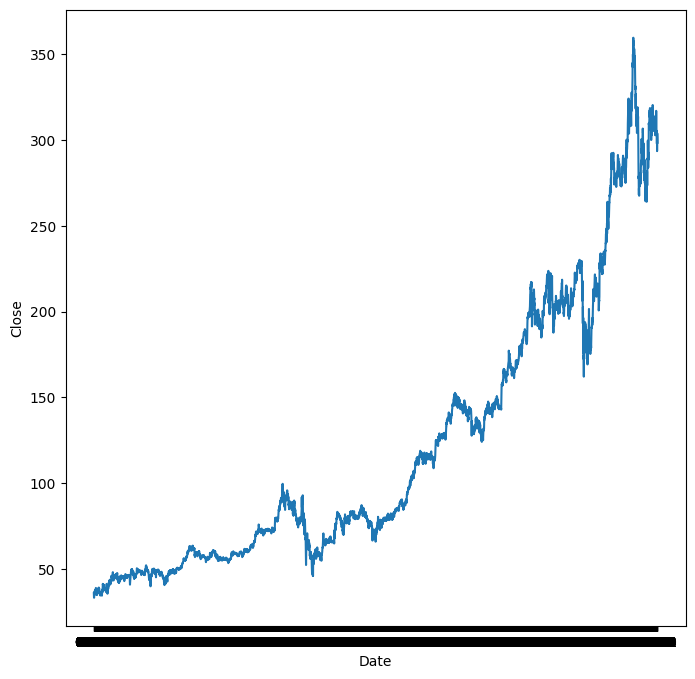

In [67]:
i = 0
# path = './data/all_tickers/'+posibilities[i]+"/"
path = './data/all_tickers/'+"Multi-Sector Holdings"+"/"



# that directory
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    print(f)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_csv(f)
        df = add_date_column(df,filename[:-4])
df

<Axes: xlabel='Date', ylabel='Close'>

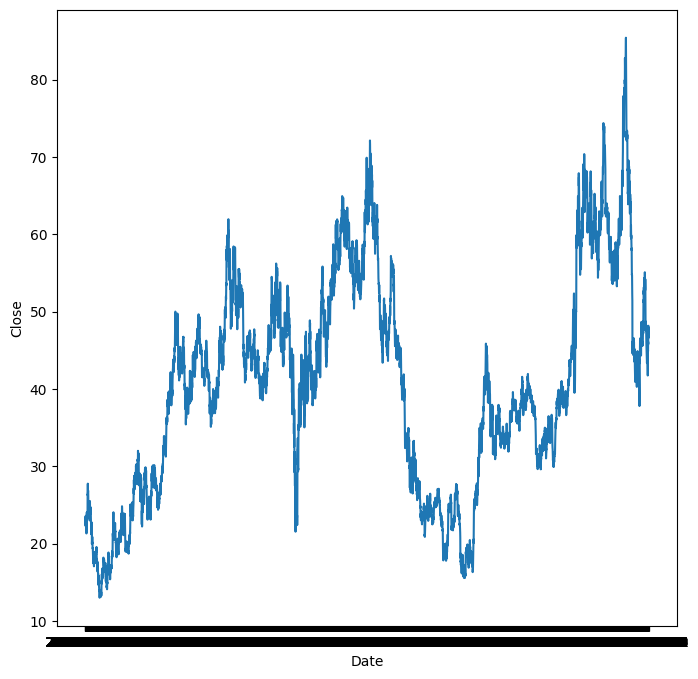

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x="Date", y="Close", data=df, ax=ax)

---
### Berkshire Hathaway

---

In [73]:
brkb = yf.download('BRK-B', period = "23y",interval = "1mo")
# file = './data/all_tickers/'+"Multi-Sector Holdings"+"/"+'BRK-B.csv'

# brkb = pd.read_csv(file)
brkb.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-04-01,36.700001,39.160000,35.099998,38.320000,38.320000,12450000
2000-05-01,38.200001,39.000000,33.200001,37.720001,37.720001,9750000
2000-06-01,37.720001,39.500000,34.400002,35.200001,35.200001,10535000
2000-07-01,35.200001,38.799999,34.115623,36.500000,36.500000,10515000
2000-08-01,36.580002,41.480000,36.340000,38.259998,38.259998,12170000


Text(0.5, 1.0, 'Comparison between Sp500 & BRKB')

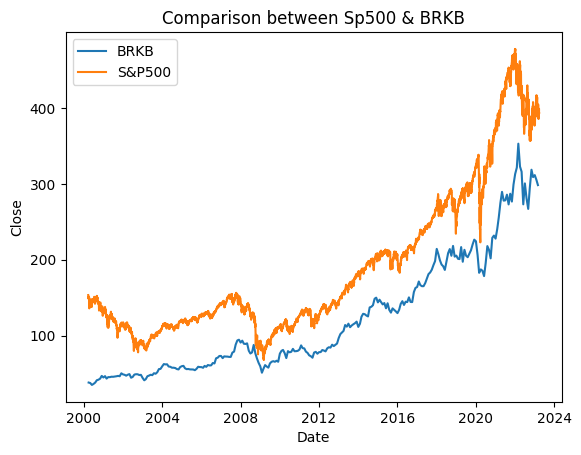

In [76]:

sns.lineplot(x="Date", y="Close",data=brkb, label="BRKB")
sns.lineplot(x="Date", y="Close",data=sp500_cap_by_month, label="S&P500")
plt.title("Comparison between Sp500 & BRKB")

---
### All sp500 companies together

---

#### Get tickers 
Note: replace . by - (e.g BRK.B ===> BRK-B)

---

In [84]:

tickers = sp500["Symbol"].map(lambda x: x.replace(".","-")).unique().tolist()



---
### Create a dict with all data

---

In [85]:
import datetime as dt

data = {}
for symbol in tickers:
    data[symbol] = yf.download(symbol, start="2000-01-01", end=dt.datetime.now(), interval="1mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

---
### Convert dict to Dataframe
Index --> Date
Each column is a company

---

In [86]:
df = pd.DataFrame(data)

In [88]:
df.shape

(279, 503)

---
#### Get financial crises interval

---

In [119]:
financial_crises = [("2000-03-10", "2002-10-09"), ("2007-10-09", "2009-03-09"), ("2020-02-19", "2020-03-23")]

In [120]:
crisis_df = []
for crisis in financial_crises:
    crisis_df .append(df.loc[crisis[0]:crisis[1]])
crisis_df

[                  MMM       AOS        ABT  ABBV        ACN      ATVI  \
 Date                                                                    
 2000-04-01  23.581125  2.270066  10.176446   NaN        NaN  0.461757   
 2000-05-01  23.342953  2.333004  10.826178   NaN        NaN  0.457139   
 2000-06-01  22.740780  2.324325  11.857246   NaN        NaN  0.480228   
 2000-07-01  24.675798  1.791414  11.042377   NaN        NaN  0.646460   
 2000-08-01  25.484921  1.763702  11.696894   NaN        NaN  1.034336   
 2000-09-01  25.118181  1.406762  12.711653   NaN        NaN  1.108217   
 2000-10-01  26.634230  1.581732  14.114790   NaN        NaN  1.020483   
 2000-11-01  27.530066  1.879703  14.773341   NaN        NaN  0.766516   
 2000-12-01  33.420097  1.929169  12.995840   NaN        NaN  1.117452   
 2001-01-01  30.688251  1.910796  12.035992   NaN        NaN  1.339095   
 2001-02-01  31.270679  2.110783  13.201735   NaN        NaN  1.694648   
 2001-03-01  28.968859  2.225896  12.7

In [121]:
crisis_df[0].head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-04-01,23.581125,2.270066,10.176446,NaN,NaN,0.461757,5.478262,30.027845,26.284300,NaN,...,NaN,29.100744,NaN,8.307421,NaN,4.330794,25.333332,NaN,28.313942,NaN
2000-05-01,23.342953,2.333004,10.826178,NaN,NaN,0.457139,6.580808,27.948406,26.864319,NaN,...,NaN,26.794498,NaN,8.576016,NaN,3.747496,21.333332,NaN,31.810522,NaN
2000-06-01,22.740780,2.324325,11.857246,NaN,NaN,0.480228,5.435707,32.277996,26.162186,NaN,...,NaN,20.751602,NaN,7.825007,NaN,3.611659,19.694445,NaN,31.521015,NaN
2000-07-01,24.675798,1.791414,11.042377,NaN,NaN,0.646460,5.193353,28.435186,24.245398,NaN,...,NaN,21.382984,NaN,8.551786,NaN,3.100273,22.694445,NaN,30.050686,NaN
2000-08-01,25.484921,1.763702,11.696894,NaN,NaN,1.034336,5.134924,32.284492,29.175501,NaN,...,NaN,19.457258,NaN,9.892000,NaN,3.725520,24.000000,NaN,30.737560,NaN


---
### Obtenemos las compañias que mejor afrontaron las crisis

---

In [145]:
sup_companies = []
for cf in crisis_df:
    avg_index = cf.apply(lambda x: (x[-1] - x[0]) / x[0]).mean()
    sup_companies.append(cf.apply(lambda x: (x[-1] - x[0]) / x[0] > 1.2*avg_index))

In [146]:
sp500_v2 = sp500.copy()

sp500_v2["Ticker"] = sp500_v2["Symbol"]
sp500_v2.set_index("Ticker", inplace=True)
sp500_v2.sort_index(inplace=True)
sp500_v2.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
Ticker,,,,,,,,
A,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
AAL,AAL,American Airlines Group,Industrials,Passenger Airlines,"Fort Worth, Texas",2015-03-23,6201,1934
AAP,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
AAPL,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
ABBV,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)


In [147]:
for sc in sup_companies:
    sc.sort_index(inplace=True)


In [152]:
# Compañias que se comportaron mejor que el sp500 durante la crisis dot com (mayor a 20%)
sp500_dot_com = sp500_v2.loc[sup_companies[0].values]

dot_com_sup_ticker = sp500_dot_com['Symbol'].unique().tolist()
dot_com_sup_sector = sp500_dot_com['GICS Sector'].unique().tolist()

In [157]:
# Compañias que se comportaron mejor que el sp500 durante la crisis subprime (mayor a 20%)
sp500_sub_prime = sp500_v2.loc[sup_companies[1].values]
sub_prime_sup_ticker = sp500_sub_prime['Symbol'].unique().tolist()
sub_prime_sup_sector = sp500_sub_prime['GICS Sector'].unique().tolist()

In [158]:
# Compañias que se comportaron mejor que el sp500 durante el covid
sp500_v2.loc[sup_companies[2].values]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
Ticker,,,,,,,,


---
### Busco repetidos - Sectores

---

In [159]:
all_crises = sub_prime_sup_sector.copy()
all_crises.extend(dot_com_sup_sector)
best_2_bubbles_sector = set(all_crises)
best_2_bubbles_sector

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

---
### Busco repetidos - Compañias

---

In [160]:
all_crises_tk = sub_prime_sup_ticker.copy()
all_crises_tk.extend(dot_com_sup_ticker)
best_2_bubbles_ticker = set(all_crises_tk)
best_2_bubbles_ticker

{'AAP',
 'AAPL',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADI',
 'ADM',
 'ADP',
 'AEE',
 'AEP',
 'AFL',
 'AJG',
 'ALB',
 'ALK',
 'ALL',
 'AMAT',
 'AME',
 'AMGN',
 'AMT',
 'AMZN',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'ARE',
 'ATO',
 'ATVI',
 'AZO',
 'BAC',
 'BALL',
 'BAX',
 'BBY',
 'BDX',
 'BF.B',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'CAG',
 'CAH',
 'CB',
 'CF',
 'CHD',
 'CHRW',
 'CINF',
 'CL',
 'CLX',
 'CMCSA',
 'CMS',
 'CNC',
 'CNP',
 'COO',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTRA',
 'CTSH',
 'CVS',
 'CVX',
 'D',
 'DGX',
 'DHI',
 'DHR',
 'DIS',
 'DLR',
 'DLTR',
 'DOV',
 'DRI',
 'DTE',
 'DUK',
 'DVA',
 'DVN',
 'DXC',
 'EA',
 'ECL',
 'ED',
 'EFX',
 'EIX',
 'EL',
 'EMR',
 'EOG',
 'EQIX',
 'EQR',
 'EQT',
 'ES',
 'ESS',
 'ETR',
 'EVRG',
 'EW',
 'EXC',
 'EXPD',
 'FAST',
 'FCX',
 'FDS',
 'FDX',
 'FE',
 'FFIV',
 'FICO',
 'FIS',
 'FISV',
 'FITB',
 'FMC',
 'FRT',
 'FSLR',
 'GD',
 'GEN',
 'GILD',
 'G

---
### Save all data

---

In [117]:
df.to_csv('./data/tk502.csv')

<Axes: xlabel='Date', ylabel='BRK-B'>

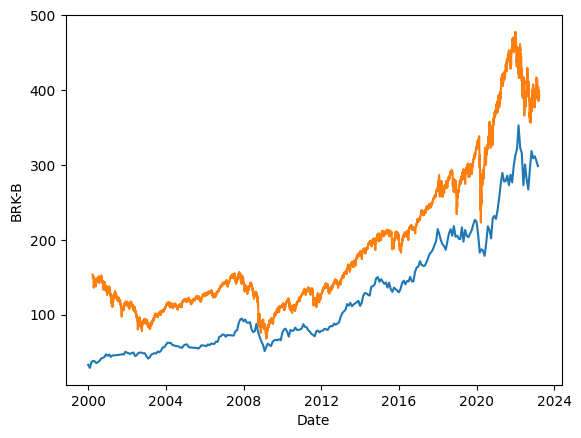

In [116]:
sns.lineplot(x="Date", y="BRK-B", data=df)
sns.lineplot(x="Date",y="Close", data=sp500_cap_by_month)

                  MMM
Date                 
2000-01-01  25.322666
2000-02-01  23.851994
2000-03-01  24.108568
2000-04-01  23.581125
2000-05-01  23.342953


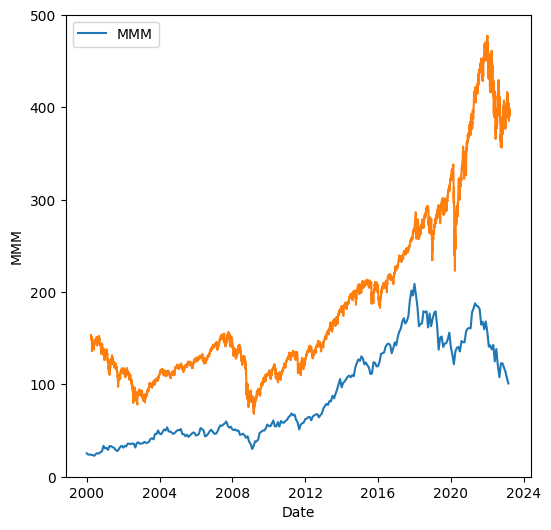

                 AOS
Date                
2000-01-01  2.167870
2000-02-01  1.904372
2000-03-01  1.987170
2000-04-01  2.270066
2000-05-01  2.333004


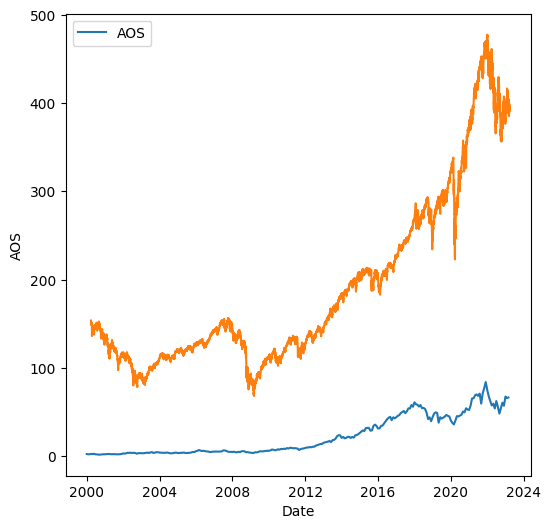

                  ABT
Date                 
2000-01-01   8.578848
2000-02-01   8.736851
2000-03-01   9.315994
2000-04-01  10.176446
2000-05-01  10.826178


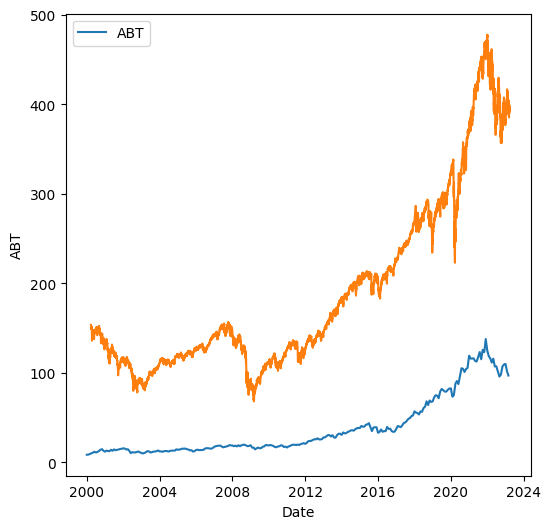

            ABBV
Date            
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN


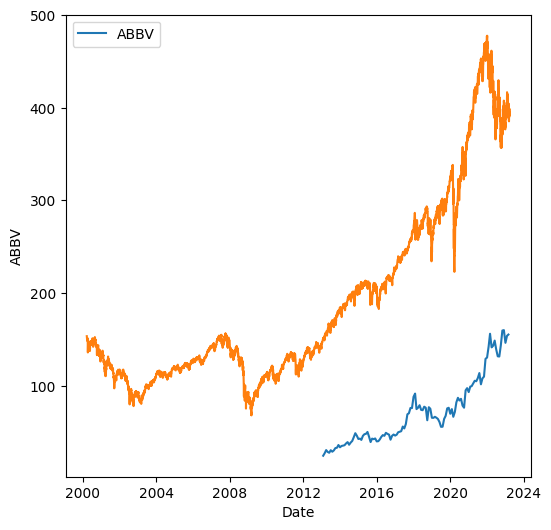

            ACN
Date           
2000-01-01  NaN
2000-02-01  NaN
2000-03-01  NaN
2000-04-01  NaN
2000-05-01  NaN


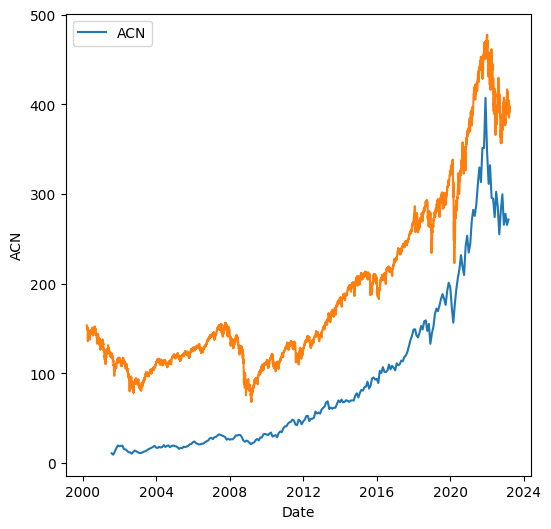

In [174]:
for i in range(5):
    dd = pd.DataFrame(df.iloc[:,i])
    print(dd.head())
    plt.figure(figsize=(6,6))
    sns.lineplot(x="Date", y=df.columns[i], data=dd, label=df.columns[i])
    sns.lineplot(x="Date",y="Close", data=sp500_cap_by_month)
    plt.show()

Es importante tener en cuenta que la composición del Dow Jones ha cambiado en los últimos 20-23 años, con empresas que han entrado y salido del índice. Sin embargo, algunas de las empresas que han mantenido su presencia en el Dow Jones durante este período y han tenido un buen desempeño son:

Apple Inc. (AAPL): la empresa líder en tecnología ha sido una de las más destacadas en el Dow Jones durante los últimos años, con un aumento del 18,000% en sus acciones desde 2000.

Microsoft Corporation (MSFT): otra empresa de tecnología que ha tenido un gran desempeño en el Dow Jones en las últimas dos décadas. Sus acciones han aumentado en más de un 1,200% desde 2000.

Visa Inc. (V): una de las empresas de servicios financieros más grandes del mundo y líder en el procesamiento de pagos electrónicos. Sus acciones han aumentado en más de un 1,500% desde 2008, cuando salió a bolsa.

McDonald's Corporation (MCD): una de las cadenas de restaurantes más grandes del mundo, que ha sido parte del Dow Jones desde hace varias décadas. Sus acciones han aumentado en más de un 400% desde 2000.

Boeing Co. (BA): una de las principales empresas de la industria aeroespacial y de defensa, que ha sido parte del Dow Jones desde hace varias décadas.

---

En términos de rendimiento, las empresas que mejor se han desempeñado en el Dow Jones Industrial Average (DJIA) en los últimos 20-23 años son:

Apple Inc. (AAPL): La empresa de tecnología ha sido la más exitosa del DJIA durante este período, con un rendimiento anual compuesto promedio (CAGR) del 25,3% desde el 2000 hasta el 2023.

Microsoft Corporation (MSFT): Otra compañía de tecnología que ha tenido un rendimiento impresionante, con un CAGR del 18,9% durante los últimos 20-23 años.

The Home Depot, Inc. (HD): La cadena minorista de mejoras para el hogar ha tenido un CAGR del 17,6% desde el 2000.

Visa Inc. (V): La empresa de tarjetas de crédito ha tenido un CAGR del 17,3% desde su salida a bolsa en 2008.

McDonald's Corporation (MCD): La cadena de comida rápida ha tenido un CAGR del 14,6% durante los últimos 20-23 años.

Es importante tener en cuenta que el rendimiento pasado no garantiza el éxito futuro, y que la inversión en el mercado de valores siempre conlleva cierto riesgo.

---
Berkshire Hathaway es una empresa muy bien administrada con un historial de rendimiento sólido a largo plazo. Durante las crisis, la empresa ha logrado superar a los índices del mercado debido a su enfoque de inversión a largo plazo y su diversificación en diferentes sectores. Además, la empresa es conocida por invertir en compañías subvaloradas y enfocarse en negocios con ventajas competitivas duraderas. Warren Buffett, el CEO de Berkshire Hathaway, es considerado uno de los mejores inversores de todos los tiempos y su enfoque de inversión ha demostrado ser exitoso a lo largo de los años. En términos generales, Berkshire Hathaway ha entregado un rendimiento muy sólido a lo largo de las últimas décadas y es una empresa que muchos inversores admiran y siguen de cerca.

Ponete en el rol de un especialista en inversiones que me tiene que recomendar invertir en algun indice, empresa, sectores, criptomonedas, small caps, etx.

Teniendo en cuenta que la crisis del covid ya paso, en que podrias recomendarme invertir?

!
Como modelo de lenguaje, mi objetivo es proporcionar información objetiva y no hacer recomendaciones de inversión específicas, ya que eso depende de muchos factores, incluidos los objetivos de inversión, el perfil de riesgo y la situación financiera de cada inversor individual.

Sin embargo, puedo proporcionar algunas ideas generales que podrían ser útiles para guiar sus decisiones de inversión. En general, después de una crisis, puede ser útil buscar oportunidades en sectores que se espera que crezcan en el futuro, como la tecnología, la salud, la energía renovable y la infraestructura.

En cuanto a las criptomonedas, es importante tener en cuenta que son un activo altamente volátil y especulativo, por lo que se debe tener cuidado al invertir en ellas. Es importante hacer una investigación exhaustiva y entender los riesgos antes de invertir en criptomonedas.

También es importante considerar la diversificación de la cartera de inversión, que puede incluir una combinación de acciones, bonos, fondos de índice y otros instrumentos financieros. Además, es importante considerar los costos y las comisiones asociados con las inversiones, así como los impuestos y la liquidez de los activos

---

Como modelo de inversión, podría recomendarte una cartera diversificada que incluya diferentes activos y sectores, con un enfoque en el largo plazo y en el control del riesgo. Algunas opciones que podrían considerarse son:

Índices bursátiles: los índices bursátiles han demostrado ser una opción rentable en el largo plazo. El S&P 500, el NASDAQ y el Dow Jones Industrial Average son algunos de los índices más populares. Para una mayor diversificación, también podrías considerar índices que cubran otros mercados y regiones, como el FTSE 100 en Reino Unido, el DAX en Alemania, el Nikkei en Japón, entre otros.

Empresas sólidas y estables: las empresas con una trayectoria sólida y estable pueden ser una buena opción para aquellos inversores que buscan minimizar el riesgo. Algunos ejemplos de empresas que han mostrado un buen desempeño son Microsoft, Apple, Amazon, Alphabet, y Facebook.

Sector tecnológico: el sector tecnológico ha demostrado ser resistente a las crisis y tiene un gran potencial de crecimiento en el largo plazo. Empresas como las mencionadas en el punto anterior, junto con otras como Tesla, NVIDIA, Shopify, entre otras, podrían ser opciones atractivas.

Criptomonedas: aunque las criptomonedas son un activo más volátil y con mayores riesgos, también pueden ofrecer grandes oportunidades de ganancias. Algunas criptomonedas de mayor capitalización como Bitcoin, Ethereum y Binance Coin podrían ser opciones a considerar. Es importante tener en cuenta que las criptomonedas son un activo altamente especulativo y su inversión debe hacerse con precaución y siempre considerando los riesgos.

Fondos cotizados (ETFs): los ETFs son una buena opción para aquellos inversores que buscan una exposición diversificada a varios sectores y empresas. Algunos ejemplos de ETFs populares incluyen el SPDR S&P 500 ETF, el Invesco QQQ Trust (que sigue al NASDAQ 100), el iShares MSCI World ETF (que ofrece exposición a los mercados mundiales), entre otros.

Es importante destacar que siempre es recomendable hacer una investigación exhaustiva sobre los activos y sectores que se deseen invertir y consultar a un asesor financiero antes de tomar cualquier decisión de inversión.

---

In [175]:
import yfinance as yf
import ta

# Obtener los datos de cierre de AAPL
data = yf.download("AAPL")

# Calcular el SMA20 y el RSI
data["SMA20"] = ta.trend.sma_indicator(data["Close"], window=20)
data["RSI"] = ta.momentum.rsi(data["Close"], window=14)

# Mostrar los últimos 5 registros
print(data.tail()) 

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-17  156.080002  156.740005  154.279999  155.000000  155.000000   
2023-03-20  155.070007  157.820007  154.149994  157.399994  157.399994   
2023-03-21  157.320007  159.399994  156.539993  159.279999  159.279999   
2023-03-22  159.300003  162.139999  157.809998  157.830002  157.830002   
2023-03-23  158.830002  161.550003  157.679993  158.929993  158.929993   

              Volume       SMA20        RSI  
Date                                         
2023-03-17  98862500  150.396001  59.831978  
2023-03-20  73641400  150.638500  63.411048  
2023-03-21  73938300  151.178500  65.969031  
2023-03-22  75701800  151.624500  62.348546  
2023-03-23  67572500  152.101000  63.964268  


[*********************100%***********************]  1 of 1 completed


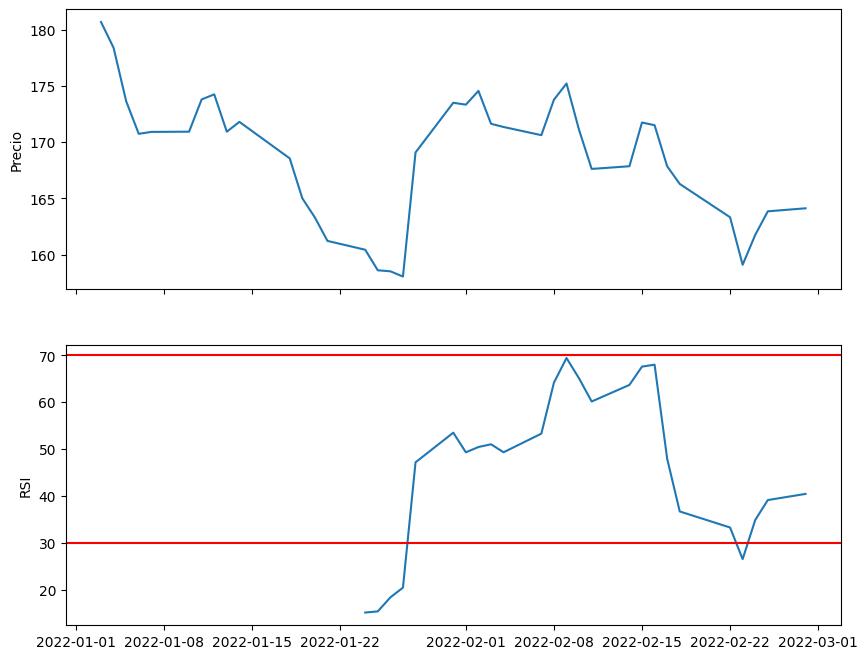

In [176]:

# Obtener datos de precios de AAPL desde Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2022-03-01')

# Calcular el RSI con un período de 14 días
delta = data['Adj Close'].diff()
gain = delta.mask(delta<0,0)
loss = -delta.mask(delta>0,0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100.0 - (100.0 / (1.0 + rs))

# Graficar los precios y el RSI
fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)
ax[0].plot(data.index, data['Adj Close'])
ax[0].set_ylabel('Precio')
ax[1].plot(rsi.index, rsi)
ax[1].set_ylabel('RSI')
ax[1].axhline(y=30, color='r', linestyle='-')
ax[1].axhline(y=70, color='r', linestyle='-')
plt.show()

Este código descarga los datos de precios de Apple desde el 1 de enero de 2022 hasta el 1 de marzo de 2022 utilizando la biblioteca yfinance. Luego, calcula el RSI con un período de 14 días y grafica tanto los precios como el RSI en una figura utilizando Matplotlib. La línea roja horizontal indica los niveles de sobreventa (30) y sobrecompra (70) del RSI.

---
### Medias moviles

---

In [182]:

# Obtener los datos del ticker de tu interés
data = yf.download("AAPL", start="2020-01-01", end="2022-01-01")

# Calcular la media móvil de 50 días
data['SMA50'] = ta.trend.sma_indicator(data['Close'], window=50)

# Calcular la media móvil de 100 días
data['SMA100'] = ta.trend.sma_indicator(data['Close'], window=100)


[*********************100%***********************]  1 of 1 completed


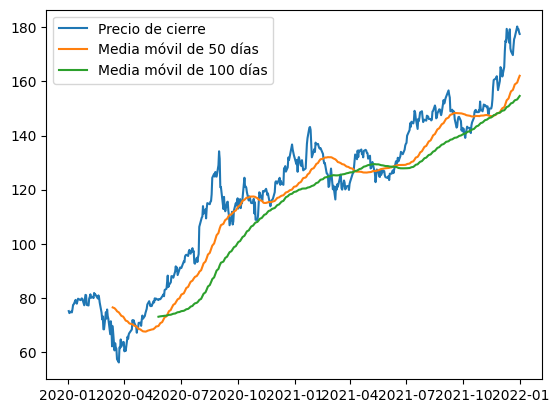

In [183]:
import matplotlib.pyplot as plt

# Graficar los precios de cierre y la media móvil de 50 días
plt.plot(data['Close'], label='Precio de cierre')
plt.plot(data['SMA50'], label='Media móvil de 50 días')
plt.plot(data['SMA100'], label='Media móvil de 100 días')
plt.legend()
plt.show()


---
Nube ichimoku

---

[*********************100%***********************]  1 of 1 completed


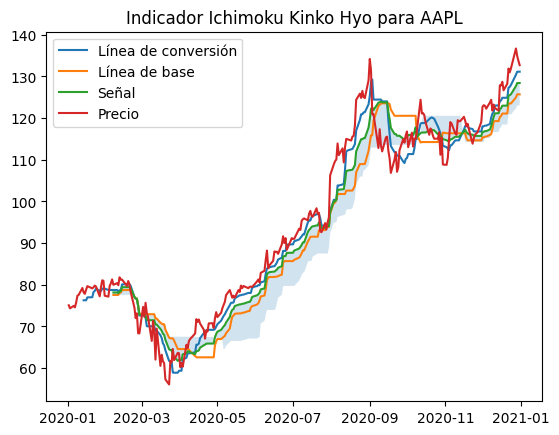

In [194]:
import yfinance as yf
import ta
import matplotlib.pyplot as plt

# Descargar datos de precios históricos de AAPL
data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")

# Calcular el Ichimoku Kinko Hyo
ichimoku = ta.trend.IchimokuIndicator(high=data["High"], low=data["Low"])
# print(ichimoku.ichimoku_b())
# print(ichimoku.ichimoku_a())

# # Graficar la nube Ichimoku
# plt.fill_between(data.index, ichimoku.ichimoku_cloud_green(), ichimoku.ichimoku_cloud_red(), alpha=0.2)
plt.fill_between(data.index, ichimoku.ichimoku_b(), ichimoku.ichimoku_a(), alpha=0.2)


# Graficar la línea de conversión y la línea de base
plt.plot(data.index, ichimoku.ichimoku_conversion_line(), label="Línea de conversión")
plt.plot(data.index, ichimoku.ichimoku_base_line(), label="Línea de base")

# Graficar la señal
plt.plot(data.index, ichimoku.ichimoku_a(), label="Señal")

# Graficar los precios
plt.plot(data.index, data["Close"], label="Precio")

# Configurar la leyenda y el título del gráfico
plt.legend()
plt.title("Indicador Ichimoku Kinko Hyo para AAPL")

# Mostrar el gráfico
plt.show()


[*********************100%***********************]  1 of 1 completed


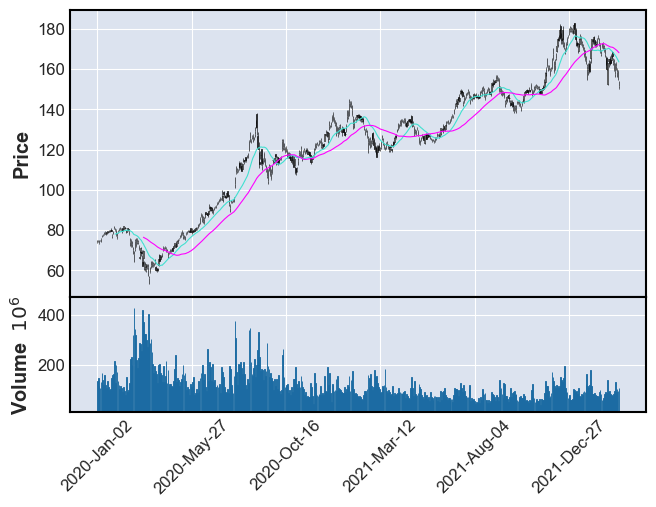

In [195]:
import yfinance as yf
import mplfinance as mpf

# Descargar datos de yfinance
data = yf.download("AAPL", start="2020-01-01", end="2022-03-15")

# Plotear velas japonesas
mpf.plot(data, type='candle', mav=(20, 50), volume=True)

In [199]:
import yfinance as yf

# import required packages
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
# Descargar datos de yfinance
data = yf.download("AAPL", start="2020-01-01", end="2022-03-15")

# Plotear velas japonesas
# mpf.candlestick_ohlc(data, width = 0.6, colorup = 'green', colordown = 'red', alpha = 0.8)

candlestick_ohlc( data, width = 0.6, colorup = 'green', colordown = 'red', alpha = 0.8)

[*********************100%***********************]  1 of 1 completed


TypeError: candlestick_ohlc() missing 1 required positional argument: 'quotes'

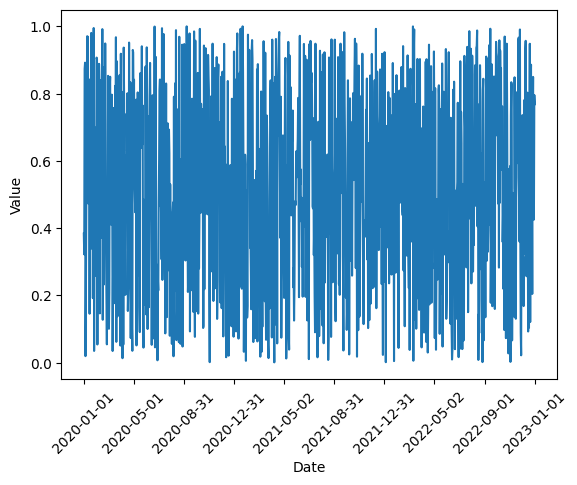

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Datos de ejemplo
dates = pd.date_range('2020-01-01', '2023-01-01', freq='D')
values = np.random.rand(len(dates))
df_short = pd.DataFrame({'Date': dates, 'Value': values})

# Seleccionar solo los datos correspondientes a 10 fechas equidistantes
num_ticks = 10
tick_indices = np.linspace(0, len(df_short)-1, num_ticks).astype(int)
data_ticks = df_short.iloc[tick_indices]['Date']

# Crear el plot con Seaborn
sns.lineplot(x='Date', y='Value', data=df_short)

# Establecer el formato de fecha adecuado
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Girar los ticks del eje x
plt.xticks(rotation=45)

# Convertir las fechas a objetos de fecha matplotlib y mostrar solo los ticks seleccionados
plt.gca().set_xticks([mdates.date2num(date) for date in data_ticks])

# Mostrar el plot
plt.show()